<a href="https://colab.research.google.com/github/Avanthikatech/NLP-Spam-Detection/blob/main/SpamDetection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langdetect
!pip install googletrans==3.1.0a0
!pip install collections
!pip install wordcloud
!pip install contractions
!pip install autocorrect
!pip install unidecode
!pip install rake_nltk
!pip install yake
!pip install gensim
!pip install yellowbrick
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=bc2d72d305ba22b2f95c7436014a3fc7a8daf3dfe92d8b779dabe975e303d861
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
from langdetect import detect
from googletrans import Translator
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import contractions
from autocorrect import Speller
from unidecode import unidecode
from string import punctuation
from nltk.tokenize import word_tokenize # to make tokens (sentense/words)
from nltk.corpus import stopwords # to get list of stopwords
from nltk.stem import WordNetLemmatizer # to find root wordss
import yake
from rake_nltk import Rake
from gensim.models import Word2Vec, keyedvectors
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing dataset as csv file

Test data set

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding="latin-1")

In [ ]:
d.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4940,ham,Omg you can make a wedding chapel in frontierv...,NaN,NaN,NaN
764,ham,"Wishing you and your family Merry \X\"" mas and...",NaN,NaN,NaN
394,ham,Pick you up bout 7.30ish? What time are and t...,NaN,NaN,NaN
2635,ham,Tiwary to rcb.battle between bang and kochi.,NaN,NaN,NaN
4524,ham,Cos i was out shopping wif darren jus now n i ...,NaN,NaN,NaN
4470,ham,Wa... U so efficient... Gee... Thanx...,NaN,NaN,NaN
2253,ham,Lol enjoy role playing much?,NaN,NaN,NaN
2358,ham,I'll talk to the others and probably just come...,NaN,NaN,NaN
1780,spam,BIG BROTHER ALERT! The computer has selected u...,NaN,NaN,NaN
4422,ham,alright. Thanks for the advice. Enjoy your nig...,NaN,NaN,NaN


In [ ]:
d = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding="latin-1", usecols=["v1","v2"])
d.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Train Data Set

In [ ]:
path = "/content/drive/MyDrive/spam.csv"
df = pd.read_csv(path,encoding = "ISO-8859-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df = df[["v1","v2"]]
df.rename({"v1": "target","v2":"text"},axis = 1,inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Language detection

In [ ]:
def lang_detect(data):
    m = ""
    try:
        m = detect(data)
    except:
        pass
    return m
s = pd.Series(df["text"].apply(lang_detect))
s.unique()

array(['en', 'id', 'es', 'so', 'af', 'it', 'pt', 'da', 'cy', 'sk', 'sl',
       'fr', 'nl', 'tl', 'vi', 'no', 'de', 'sq', 'cs', 'et', 'ca', 'sv',
       'pl', 'sw', 'hr', '', 'hu', 'ro', 'tr', 'lt', 'fi'], dtype=object)

Translating to English

In [ ]:
def lang_translate(data):
    translor = Translator()
    tr_text = translor.translate(data,dest="en")
    return tr_text.text
df["mail"] = df["text"].apply(lang_translate)
df.head()

,target,text,mail
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.to_csv("translated_mail.csv",index = False)

In [ ]:
df.drop("text",axis = 1, inplace = True)

Preprocessing

In [ ]:
d.rename(columns={"v1": "output","v2": "input"}, inplace = True)
d.head(10)

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
le = LabelEncoder()
d["output"] = le.fit_transform(d["output"])

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
d.describe()

,output
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.describe()

,target,mail
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
d.isnull()

,output,input
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
df.isnull()

,target,mail
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
d.isnull().sum()

output    0
input     0
dtype: int64

In [ ]:
df.isnull().sum()

target    0
mail      0
dtype: int64

In [ ]:
 df.target.value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

Feature Engineering


In [ ]:
d["characters"] = d["input"].apply(len)
d["word"] = d["input"].apply(lambda x:len( nltk.word_tokenize(x)))
d["sentence"] = d["input"].apply(lambda x:len(nltk.sent_tokenize(x)))
d.head(10)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [ ]:
d[d["output"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
d[["characters","word", "sentence"]].describe()


,characters,word,sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


Observation For Test Data Set

In [ ]:
ps = PorterStemmer()

In [ ]:
def data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [ ]:
data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [ ]:
d.sample(2)

,output,input,characters,word,sentence
2457,0,K.k..how is your sister kids?,29,8,1
3850,0,We have all rounder:)so not required:),38,11,1


In [ ]:
d["new_data"] = d["input"].apply(data)

In [ ]:
d.sample(5)

,output,input,characters,word,sentence,new_data
1815,0,Sian... Aft meeting supervisor got work 2 do l...,67,15,1,sian aft meet supervisor got work 2 liao u work
881,0,"see, i knew giving you a break a few times wou...",276,67,4,see knew give break time woul lead alway want ...
3567,0,Sent me de webadres for geting salary slip,42,8,1,sent de webadr gete salari slip
1524,0,Hi:)cts employee how are you?,29,9,1,hi ct employe
4432,0,Can u look 4 me in da lib i got stuff havent f...,56,15,1,u look 4 da lib got stuff havent finish yet


EDA

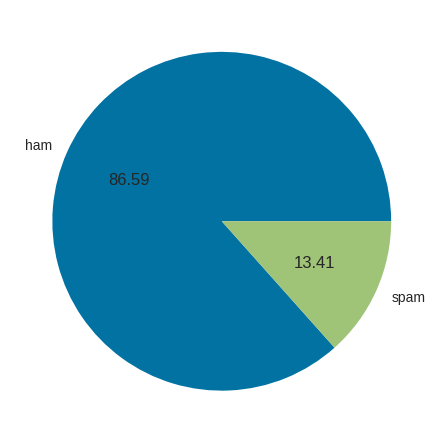

In [ ]:
plt.pie(d["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

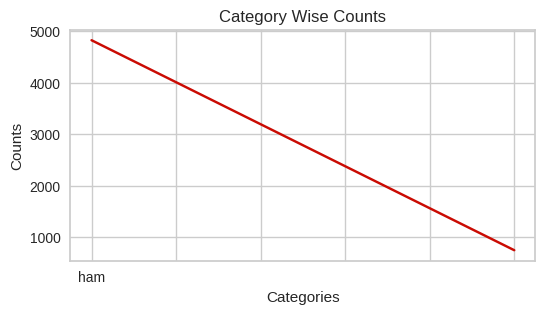

In [ ]:
_ = df.target.value_counts()
plt.figure(figsize = (6,3))
_.plot(kind = "line",color = "r")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.title("Category Wise Counts")
plt.show()

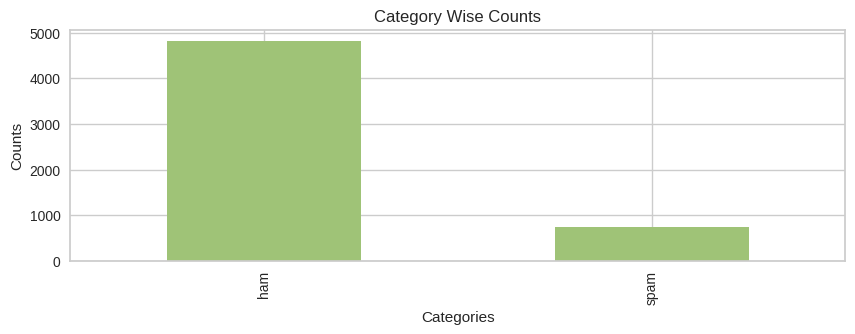

In [ ]:
_ = df.target.value_counts()
plt.figure(figsize = (10,3))
_.plot(kind = "bar",color = "g")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.title("Category Wise Counts")
plt.show()

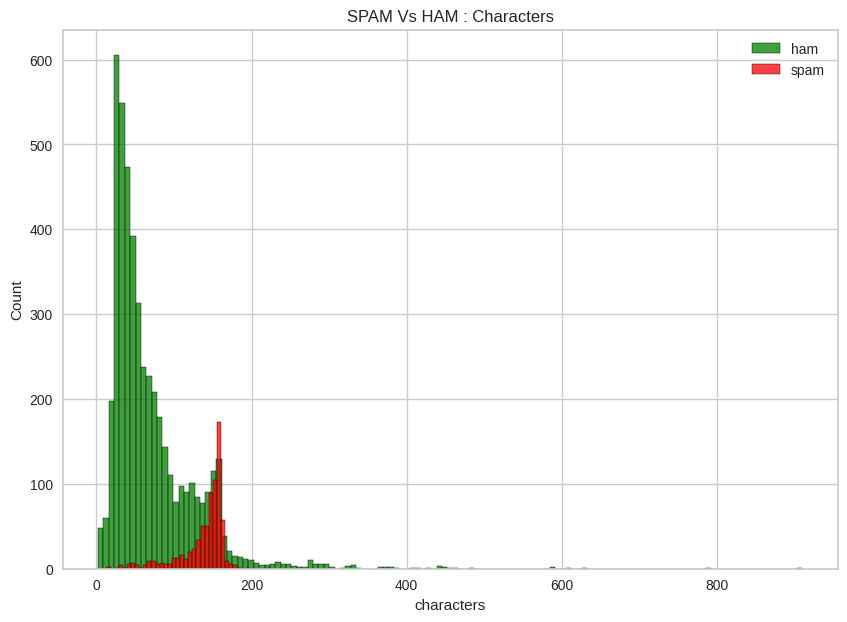

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(d[d["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(d[d["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

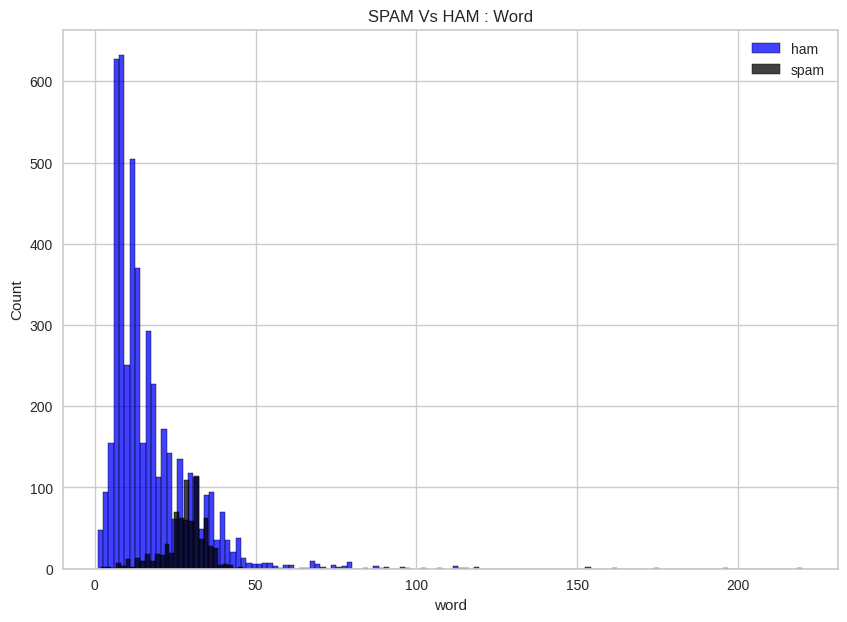

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(d[d["output"]==0]["word"],label= "ham",color="blue")
sns.histplot(d[d["output"]==1]["word"],label= "spam",color = "black")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

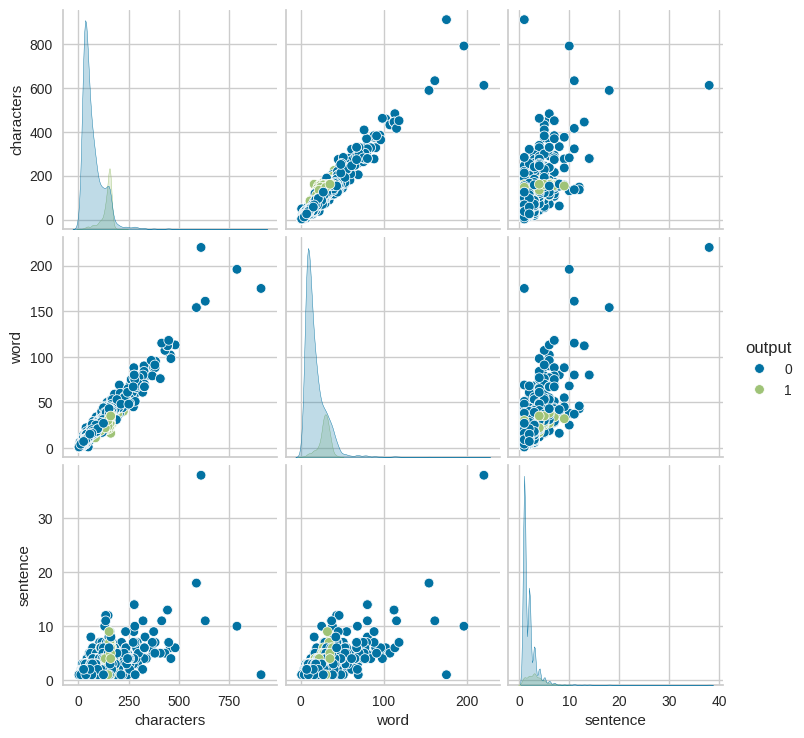

In [ ]:
sns.pairplot(d,hue="output")

Heat Map

<Axes: >

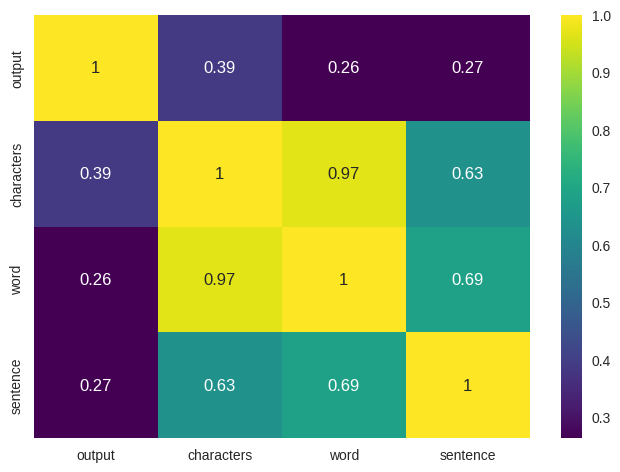

In [ ]:
numeric_data = d.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

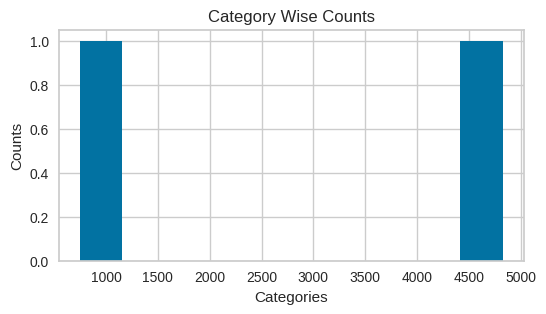

In [ ]:
_ = df.target.value_counts()
plt.figure(figsize = (6,3))
_.plot(kind = "hist",color = "b")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.title("Category Wise Counts")
plt.show()

Checking ngrams

In [ ]:
def get_ngrams(data, n_range):
    tokens = data.split()
    ngrms  = ngrams(tokens, n_range )
    ngrms_lst = []
    for i in ngrms:
        ngrms_lst.append(" ".join(i))
    return ngrms_lst

Getting unigrams

In [ ]:
unigrams = df.mail.apply(lambda x: get_ngrams(x,1))
unigrams.head(10)

0    [Go, until, jurong, point,, crazy.., Available...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor..., U, c, already...
4    [Nah, I, don't, think, he, goes, to, usf,, he,...
5    [FreeMsg, Hey, there, darling, it's, been, 3, ...
6    [Even, my, brother, is, not, like, to, speak, ...
7    [As, per, your, request, 'Melle, Melle, (Oru, ...
8    [WINNER!!, As, a, valued, network, customer, y...
9    [Had, your, mobile, 11, months, or, more?, U, ...
Name: mail, dtype: object

checking most repeated words from all the mails

In [ ]:

lst = []
for i in unigrams:
    lst.extend(i)
Counter(lst).most_common(20)

[('to', 2144),
 ('you', 1638),
 ('I', 1474),
 ('a', 1334),
 ('the', 1214),
 ('and', 896),
 ('in', 799),
 ('is', 782),
 ('i', 742),
 ('u', 680),
 ('your', 650),
 ('for', 649),
 ('my', 630),
 ('of', 591),
 ('me', 559),
 ('have', 491),
 ('on', 490),
 ('2', 453),
 ('that', 431),
 ('are', 400)]

Checking most repeted 10 trigrams

In [ ]:
trigram = df.mail.apply(lambda x: get_ngrams(x,3))
lst1 = []
for i in trigram:
    lst1.extend(i)
Counter(lst1).most_common(20)

[("I'll call later", 39),
 ("Sorry, I'll call", 38),
 ('. . .', 26),
 ('I want to', 24),
 ('have won a', 23),
 ('prize GUARANTEED. Call', 19),
 ('I miss you', 19),
 ('å£1000 cash or', 17),
 ('I love you', 16),
 ('are trying to', 16),
 ('Account Statement for', 16),
 ('from land line.', 16),
 ('trying to contact', 15),
 ('cash or a', 15),
 ('let me know', 15),
 ('Have a great', 15),
 ('Do you want', 15),
 ('Hope you are', 15),
 ('is the 2nd', 15),
 ('Do have a', 14)]

Checking Bigrams

In [ ]:
bigram = df.mail.apply(lambda x: get_ngrams(x,2))
lst1 = []
for i in bigram:
    lst1.extend(i)
Counter(lst1).most_common(20)

[('I am', 88),
 ('in the', 87),
 ('have a', 85),
 ('are you', 82),
 ('want to', 81),
 ('will be', 79),
 ('to be', 77),
 ('in a', 74),
 ('. .', 72),
 ('you are', 70),
 ('to get', 69),
 ('going to', 68),
 ('Are you', 68),
 ('I will', 68),
 ('have to', 67),
 ('you have', 63),
 ('if you', 60),
 ('for the', 59),
 ('on the', 58),
 ('Do you', 57)]

Plotting Word Cloud For Traning Dataset

In [ ]:
def get_wordcloud(data,column):
    df_ = data[column].str.cat(sep = " ")
    text = " ".join([i for i in df_.split()])
    wcloud = WordCloud(width = 1000, height =700, background_color = "lightblue").generate(text)
    plt.figure(figsize = (20,10))
    plt.imshow(wcloud)
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

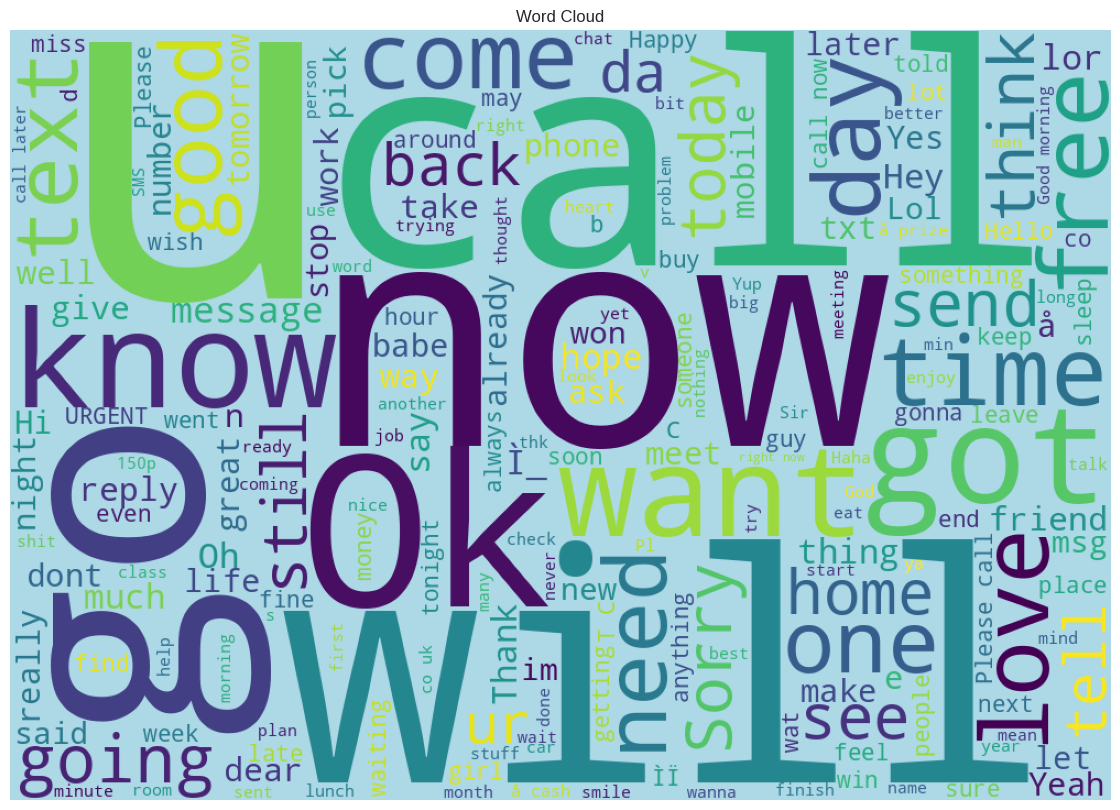

In [ ]:
get_wordcloud(df,"mail")

Word Cloud For Test Data Set

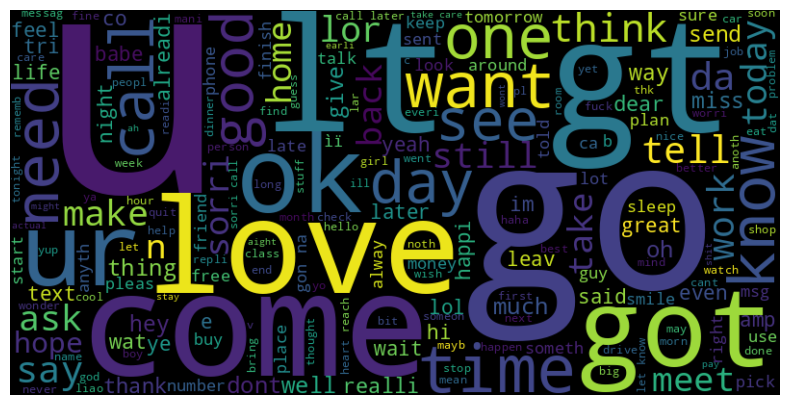

In [ ]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)
# Wordcloud for SPAM
try:
  spam_wc = wc.generate(d[d["output"] ==1]["new_data"].str.cat(sep=" "))
except:
  pass

# Wordcloud for HAM
try:
  ham_wc = wc.generate(d[d["output"] ==0]["new_data"].str.cat(sep=" "))
except:
  pass
# SPAM
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

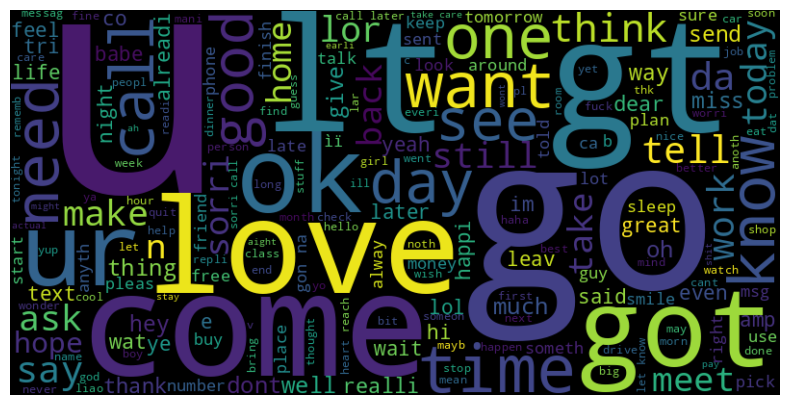

In [ ]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Splliting Spam In The Words

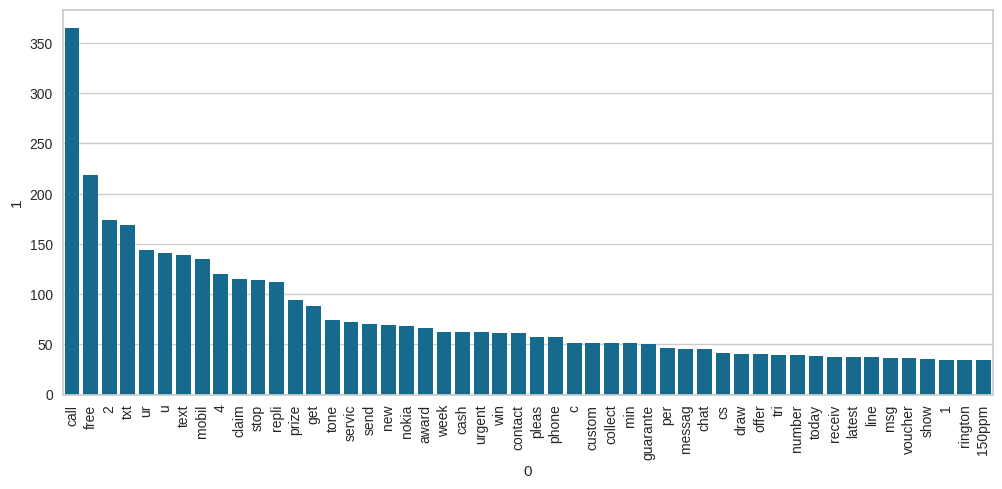

In [ ]:
spam_corpus = []
try:
  for msg in d[d["output"]==1]["new_data"].tolist():
      for word in msg.split():
          spam_corpus.append(word)

# Top 50 SPAM Words
  a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
  b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
  plt.figure(figsize=(12,5))
  sns.barplot(x= a,y=b)
  plt.xticks(rotation=90)
except:
  pass

plt.show()

Splitting Ham In The Words

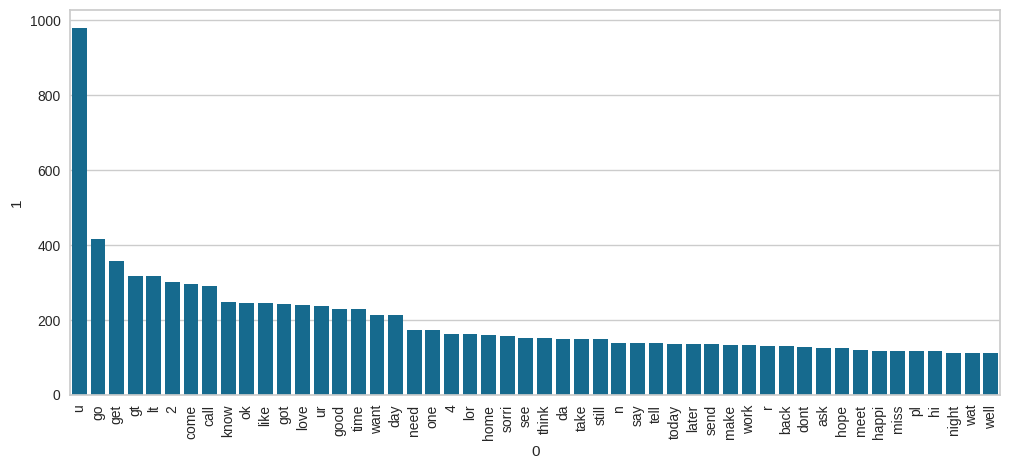

In [ ]:
try:
  ham_corpus = []
  for msg in d[d['output'] == 0]['new_data'].tolist():
      for word in msg.split():
          ham_corpus.append(word)
# Top 50 HAM Words
  a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
  b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
  plt.figure(figsize=(12,5))
  sns.barplot(x= a,y=b)
  plt.xticks(rotation=90)
except:
  pass

plt.show()

Keyphrase Extraction

In [ ]:
def get_keypharses(data):
    key_ex = yake.KeywordExtractor()
    keyword = key_ex.extract_keywords(data)
    kw_lst = []
    for i in keyword:
        kw_lst.append(i[0])
    return kw_lst

In [ ]:
kw = df.mail.apply(get_keypharses)
kw.head(10)

0    [crazy., jurong point, point, jurong, buffet, ...
1       [lar, Joking wif, wif u oni, Joking, oni, wif]
2    [Cup final tkts, win FA Cup, Cup final, final ...
3                         [early hor, hor, dun, early]
4                                    [Nah, usf, lives]
5    [FreeMsg Hey, Hey there darling, word back, He...
6    [aids patent, brother, speak, patent, treat, a...
7    [Oru Minnaminunginte Nurungu, Minnaminunginte ...
8    [WINNER, prize reward, claim, Valid, prize, re...
9    [Update, Mobile Update, months, Free, mobile, ...
Name: mail, dtype: object

Getting most common keywords

In [ ]:
lstk = []
for i in kw:
    lstk.extend(i)
Counter([i for i in lstk if len(i.split()) > 2]).most_common(20)

[('selected to receive', 13),
 ('attempt to contact', 13),
 ('pick the phone', 12),
 ('send a message', 12),
 ('customer service representative', 10),
 ('WON a guaranteed', 10),
 ('call our customer', 10),
 ('draw txt MUSIC', 9),
 ('chance to win', 9),
 ('anytime any network', 9),
 ('Todays draw shows', 9),
 ('mob every week', 9),
 ('Bonus Caller Prize', 8),
 ('contact with U-find', 8),
 ('await collection SAE', 8),
 ('claim is easy', 8),
 ('Congratulations ur awarded', 7),
 ('maximize ur cash-in', 7),
 ('cash-in now send', 7),
 ('worth of discount', 7)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

def remove_spaces(data):
    clean_text = data.replace("\\n"," ").replace("\t"," ").replace("\\"," ")
    return clean_text
def expand_text(data):
    ex_text = contractions.fix(data)
    return ex_text
def handling_accented(data):
    fix_text = unidecode(data)
    return fix_text
stopword = stopwords.words("english")
stopword.remove("no")
stopword.remove("not")
stopword.remove("nor")

def clean_text(data):
    token = word_tokenize(data)
    clean_text = [i.lower() for i in token if (i not in punctuation)
                  and (i.lower() not in stopword) and (i.isalpha()) and (len(i) > 2)]
    return clean_text
def auto_correct(data):
    spell = Speller(lang = "en")
    text = spell(data)
    return text
def lemmatization(data):
    lem = WordNetLemmatizer()
    lst1 = []
    for i in data:
        lem_words = lem.lemmatize(i)
        lst1.append(lem_words)
    return " ".join(lst1)

In [ ]:

  >>> import nltk
  >>> nltk.download('punkt')
  >>> nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df["clean_mails"] = df["mail"].apply(remove_spaces)
df["clean_mails"] = df["clean_mails"].apply(expand_text)
df["clean_mails"] = df["clean_mails"].apply(handling_accented)
df["clean_mails"] = df["clean_mails"].apply(clean_text)
df["clean_mails"] = df["clean_mails"].apply(lambda x: auto_correct(x) if isinstance(x, str) or isinstance(x, bytes) else x)
df["clean_mails"] = df["clean_mails"].apply(lemmatization)

Now we have final mails so we will drop the mail feature

In [ ]:
df.drop("mail",axis = 1, inplace = True)
df.head(10)

,target,clean_mails
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah not think go usf life around though
5,spam,freemsg hey darling week word back would like ...
6,ham,even brother not like speak treat like aid patent
7,ham,per request melle oru minnaminunginte nurungu ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile month entitled update latest colour mob...


encoding the target feature

In [ ]:
df.target.replace({"spam": 0, "ham": 1}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       5572 non-null   int64 
 1   clean_mails  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.head()

,target,clean_mails
0,1,jurong point crazy available bugis great world...
1,1,lar joking wif oni
2,0,free entry wkly comp win cup final tkts may te...
3,1,dun say early hor already say
4,1,nah not think go usf life around though


In [ ]:
df.describe()

,target
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


spliting the data to avoid data leakage

In [ ]:
x = df["clean_mails"]
y = df["target"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

Creating the vectors of the mails

In [ ]:
cnv = CountVectorizer(max_df=0.95,max_features=1000,min_df = 10, stop_words="english",lowercase=True)
x_train = cnv.fit_transform(x_tr).A
x_test  = cnv.transform(x_te).A


Balancing the data

In [ ]:
st = SMOTE(sampling_strategy=0.75,random_state=42)
sm_x_train,sm_y_train = st.fit_resample(x_train,y_tr)
sm_x_test,sm_y_test   = st.fit_resample(x_test,y_te)

In [ ]:
print(f"first we have\n{y_tr.value_counts()}\nAfter balancing we have\n{sm_y_train.value_counts()}")

first we have
target
1    3619
0     560
Name: count, dtype: int64
After balancing we have
target
1    3619
0    2714
Name: count, dtype: int64


Vectorization For Testing Dataset

In [ ]:
try:
 tfidv = TfidfVectorizer(max_features=3000)
 X = tfidv.fit_transform(d["new_data"]).toarray()
 y = d["output"].values
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
except:
  pass

Model selection and training

In [ ]:
models = [("Multinomial Naive Bayes", MultinomialNB()),
          ("Gaussian Naive Bayes", GaussianNB()),
          ("XG Boost", XGBClassifier())]
for name,model in models:
    mod = model
    mod.fit(sm_x_train,sm_y_train)
    pred = mod.predict(sm_x_train)
    acc = accuracy_score(sm_y_train,pred)
    pred1 = mod.predict(sm_x_test)
    acc1 = accuracy_score(sm_y_test,pred1)
    print(f"The accuracy of the {name} model:\nAt Training: ",acc)
    print("At Testing: ",acc1)
    print("+"*50)

The accuracy of the Multinomial Naive Bayes model:
At Training:  0.8880467393020686
At Testing:  0.8123222748815165
++++++++++++++++++++++++++++++++++++++++++++++++++
The accuracy of the Gaussian Naive Bayes model:
At Training:  0.8127269856308227
At Testing:  0.7796208530805687
++++++++++++++++++++++++++++++++++++++++++++++++++
The accuracy of the XG Boost model:
At Training:  0.8953102794883941
At Testing:  0.7985781990521327
++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:

modelee={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [ ]:
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    return acc, pre

In [ ]:
acc_s=[]
pre_s=[]
f1_s=[]
for name, model in modelee.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)

    acc_s.append(accuracy)
    pre_s.append(precision)
    try:
      f1_s.append()
    except:
      pass

In [ ]:
scores_df = pd.DataFrame({"Algorithm": modelee.keys(),
                          "Accuracy": acc_s,
                         "Precision": pre_s
                         }).sort_values(by="Precision", ascending=False)

In [ ]:
scores_df

,Algorithm,Accuracy,Precision
4,SVC,0.970404,1.000000
6,KNN,0.904036,1.000000
9,ETC,0.969507,1.000000
8,Random Forest,0.966816,0.991870
1,Multinomial NB,0.965022,0.991736
3,Logistic Regression,0.956054,0.990991
2,Bernoulli NB,0.974888,0.985075
12,XGB,0.965022,0.976000
10,Ada Boost,0.959641,0.959350
11,Gradient Boost,0.947982,0.946429


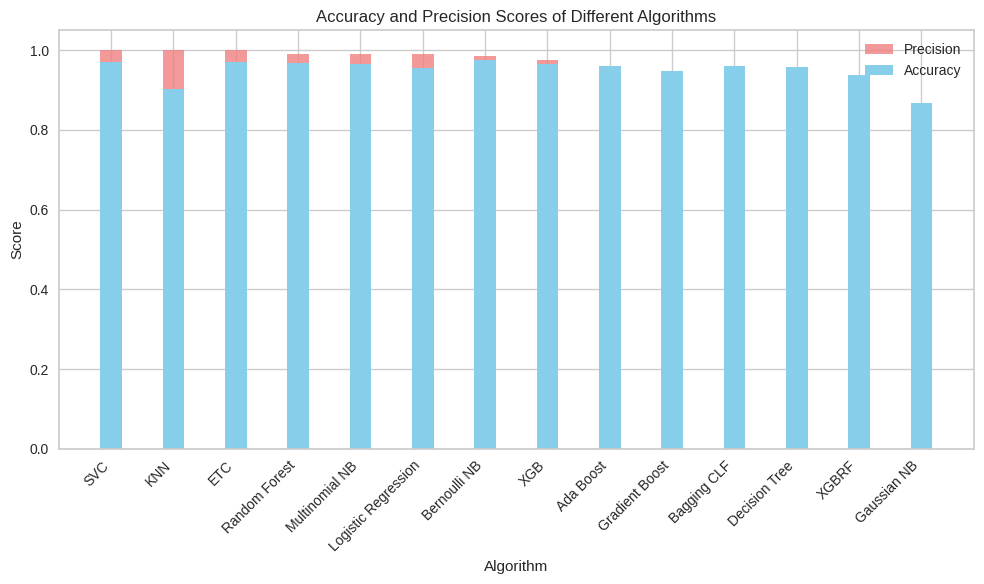

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Tuning & Training the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
estimator = MultinomialNB()
params_NB = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],
            "fit_prior":[True,False]}
rnd = RandomizedSearchCV(estimator=estimator, param_distributions=params_NB,
                         cv= 30, verbose=3, scoring='accuracy',return_train_score=True)
rnd.fit(sm_x_train,sm_y_train)
rnd.best_params_

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 1/30] END alpha=10, fit_prior=True;, score=(train=0.878, test=0.972) total time=   0.1s
[CV 2/30] END alpha=10, fit_prior=True;, score=(train=0.880, test=0.915) total time=   0.1s
[CV 3/30] END alpha=10, fit_prior=True;, score=(train=0.877, test=0.943) total time=   0.1s
[CV 4/30] END alpha=10, fit_prior=True;, score=(train=0.877, test=0.943) total time=   0.1s
[CV 5/30] END alpha=10, fit_prior=True;, score=(train=0.879, test=0.934) total time=   0.1s
[CV 6/30] END alpha=10, fit_prior=True;, score=(train=0.877, test=0.919) total time=   0.1s
[CV 7/30] END alpha=10, fit_prior=True;, score=(train=0.882, test=0.867) total time=   0.1s
[CV 8/30] END alpha=10, fit_prior=True;, score=(train=0.881, test=0.896) total time=   0.1s
[CV 9/30] END alpha=10, fit_prior=True;, score=(train=0.879, test=0.853) total time=   0.1s
[CV 10/30] END alpha=10, fit_prior=True;, score=(train=0.881, test=0.877) total time=   0.1s
[CV 11/30] END a

{'fit_prior': False, 'alpha': 0.001}

In [ ]:
mlnb = MultinomialNB(fit_prior = False, alpha = 1)
mlnb.fit(sm_x_train,sm_y_train)

MultinomialNB(alpha=1, fit_prior=False)

Model evaluation

In [ ]:
pred = mlnb.predict(sm_x_train)
acc = accuracy_score(sm_y_train,pred)
clf = classification_report(sm_y_train,pred)
print("Training accuracy is: ",acc)
print("\n")
print("The classifiaction report:\n",clf)

Training accuracy is:  0.9194694457603032


The classifiaction report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2714
           1       0.98      0.88      0.93      3619

    accuracy                           0.92      6333
   macro avg       0.92      0.93      0.92      6333
weighted avg       0.93      0.92      0.92      6333



In [ ]:
pred1 = mlnb.predict(sm_x_test)
acc1 = accuracy_score(sm_y_test,pred1)
clf1 = classification_report(sm_y_test,pred1)
print("Testing accuracy is: ",acc1)
print("\n")
print("The classifiaction report:\n",clf1)

Testing accuracy is:  0.9042654028436019


The classifiaction report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89       904
           1       0.96      0.87      0.91      1206

    accuracy                           0.90      2110
   macro avg       0.90      0.91      0.90      2110
weighted avg       0.91      0.90      0.90      2110



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the dictionary for predictions
dics = {1: "ham" , 0:"spam" }

# Instantiate CountVectorizer
cnv = CountVectorizer()

# Instantiate MultinomialNB
mlnb = MultinomialNB()

# Training data
training_data = ["Free money!!!", "Hey, how are you?", "Meet me at 5pm"]

# Training labels
training_labels = [0, 1, 1]  # Assuming the first one is spam, and the others are ham

# Fit CountVectorizer
X_train_counts = cnv.fit_transform(training_data)

# Fit MultinomialNB
mlnb.fit(X_train_counts, training_labels)

# User input
text = input(" ")

# Create a vector of this review
vector1 = cnv.transform([text])

# Get prediction
prediction = mlnb.predict(vector1)

# Print the result
print("The mail is:", dics[prediction[0]])

 URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
The mail is: spam


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the dictionary for predictions
dics = {1: "ham" , 0:"spam" }

# Instantiate CountVectorizer
cnv = CountVectorizer()

# Instantiate MultinomialNB
mlnb = MultinomialNB()

# Training data
training_data = ["Free money!!!", "Hey, how are you?", "Meet me at 5pm"]

# Training labels
training_labels = [0, 1, 1]  # Assuming the first one is spam, and the others are ham

# Fit CountVectorizer
X_train_counts = cnv.fit_transform(training_data)

# Fit MultinomialNB
mlnb.fit(X_train_counts, training_labels)

# User input
text = input(" ")

# Create a vector of this review
vector1 = cnv.transform([text])

# Get prediction
prediction = mlnb.predict(vector1)

# Print the result
print("The mail is:", dics[prediction[0]])


 Hi how are you???
The mail is: ham
